In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from glob import glob
import os

In [2]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', '_classic_test']


In [3]:
#sns.set_context("poster")
plt.style.use('seaborn-poster')
sns.set_style("ticks")

## GDELT QuadClasses

```
1=Verbal Cooperation
2=Material Cooperation
3=Verbal Conflict
4=Material Conflict
```

Source: http://data.gdeltproject.org/documentation/GDELT-Data_Format_Codebook.pdf

In [4]:
def get_datasets():
    datasets = dict()
    for filename in glob("../data/*.csv"):
        basename = os.path.basename(filename).split(".", 1)[0]
        df = pd.read_csv(filename)
        datasets[basename] = df.assign(QuadClassName=df.QuadClass.apply(QUAD_CLASSES.get))
    print(df.columns)
    return datasets
        
QUAD_CLASSES = {
    1: "Verbal Cooperation",
    2: "Material Cooperation",
    3: "Verbal Conflict",
    4: "Material Conflict"
}    

In [5]:
datasets = get_datasets()

Index(['Source', 'Target', 'Year', 'QuadClass', 'ECount', 'NSources',
       'MaxSources', 'AvgSources', 'StdDevSources'],
      dtype='object')


In [6]:
datasets.keys()

dict_keys(['AFG', 'AUS', 'BRA', 'CHN', 'FRA', 'GBR', 'GRC', 'IND', 'IRN', 'IRQ', 'ISR', 'PAK', 'RUS', 'USA', 'ZAF'])

In [7]:
pd.concat({
    k: df_t["QuadClassName"].value_counts()
    for k, df_t in datasets.items()
}, axis=1)

,AFG,AUS,BRA,CHN,FRA,GBR,GRC,IND,IRN,IRQ,ISR,PAK,RUS,USA,ZAF
Material Conflict,836,1050,480,1412,1861,2299,587,673,1297,1063,1469,1001,2050,4110,779
Material Cooperation,786,1361,640,2065,2112,2550,631,779,1258,1080,1275,975,2122,4365,956
Verbal Conflict,831,1323,629,1719,2199,2711,779,830,1659,1330,1822,1065,2377,4557,1161
Verbal Cooperation,1873,2741,2074,5190,4717,4785,1925,2363,3389,2468,3260,2571,4379,6252,2675


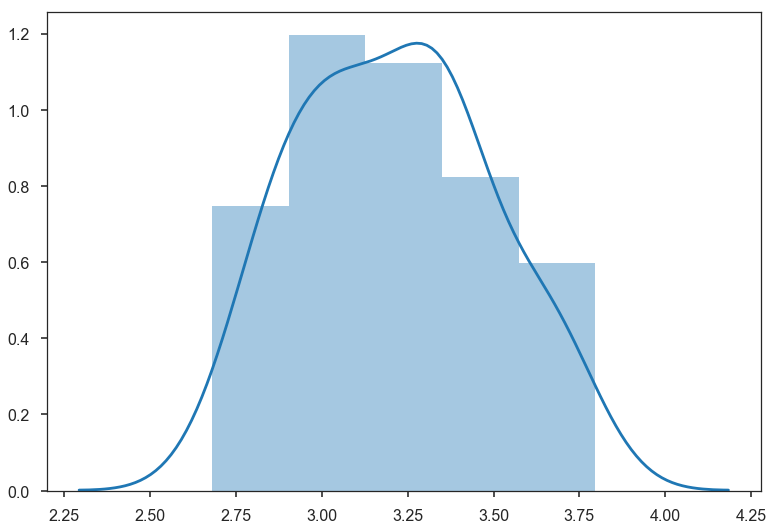

In [8]:
sns.distplot(pd.concat(
        {
            k: df_t["QuadClassName"].value_counts().apply(np.log10)
            for k, df_t in datasets.items()
        },
        axis=1
    ).values.flatten(), bins=5)

In [9]:
df_t = pd.concat(
    {
        k: df_t["QuadClassName"].value_counts().apply(np.log10)
        for k, df_t in datasets.items()
    },
    axis=1
)

In [10]:
df_t.mean(axis=1)

Material Conflict       3.075098
Material Cooperation    3.116533
Verbal Conflict         3.159480
Verbal Cooperation      3.497621
dtype: float64

In [11]:
df_t.subtract(df_t.mean(axis=1), axis=0).divide(df_t.std(axis=1), axis=0)

,AFG,AUS,BRA,CHN,FRA,GBR,GRC,IND,IRN,IRQ,ISR,PAK,RUS,USA,ZAF
Material Conflict,-0.617001,-0.217551,-1.589426,0.301602,0.785511,1.155944,-1.236732,-0.997114,0.152712,-0.195986,0.370962,-0.301310,0.955034,2.174122,-0.740767
Material Cooperation,-0.911741,0.071442,-1.279731,0.818046,0.858348,1.195839,-1.305093,-0.927762,-0.069488,-0.342697,-0.045450,-0.525858,0.866807,2.158440,-0.561100
Verbal Conflict,-1.022562,-0.161646,-1.538153,0.323107,0.779014,1.166524,-1.142193,-1.024791,0.257333,-0.151876,0.430839,-0.563248,0.923115,2.128004,-0.403466
Verbal Cooperation,-1.341695,-0.355937,-1.077801,1.296765,1.049380,1.086433,-1.270802,-0.740088,0.193432,-0.627538,0.092968,-0.521691,0.856898,1.778712,-0.419035


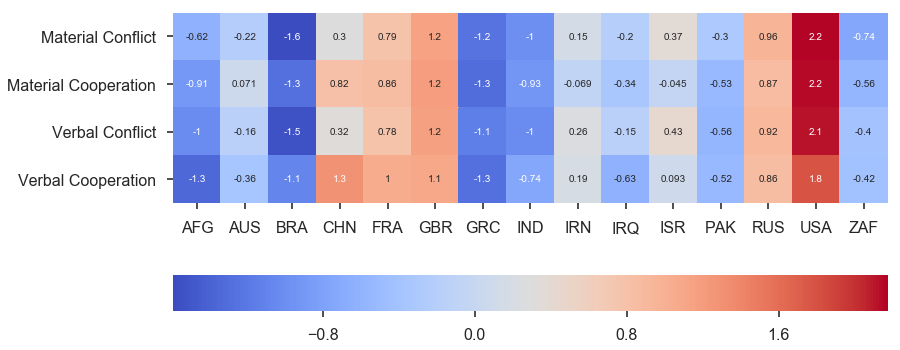

In [12]:
df_t = pd.concat(
    {
        k: df_t["QuadClassName"].value_counts().apply(np.log10)
        for k, df_t in datasets.items()
    },
    axis=1
)


df_t = df_t.subtract(df_t.mean(axis=1), axis=0).divide(df_t.std(axis=1), axis=0)
sns.heatmap(
    df_t,
    square=True,
    cmap="coolwarm",
    annot=True,
    cbar_kws={"orientation": "horizontal"}
)



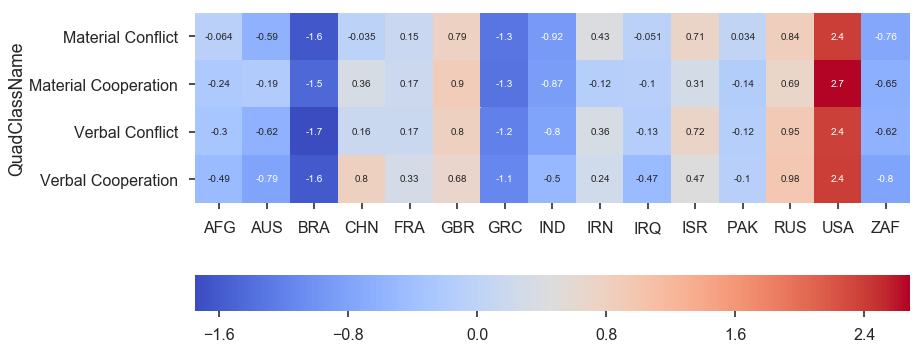

In [13]:
df_t = pd.concat(
    {
        k: df_t.groupby("QuadClassName")["ECount"].sum().apply(np.log10)
        for k, df_t in datasets.items()
    },
    axis=1
)


df_t = df_t.subtract(df_t.mean(axis=1), axis=0).divide(df_t.std(axis=1), axis=0)
sns.heatmap(
    df_t,
    square=True,
    cmap="coolwarm",
    annot=True,
    cbar_kws={"orientation": "horizontal"}
)

plt.savefig("Country-Ecount.svg", bbox_inches="tight")


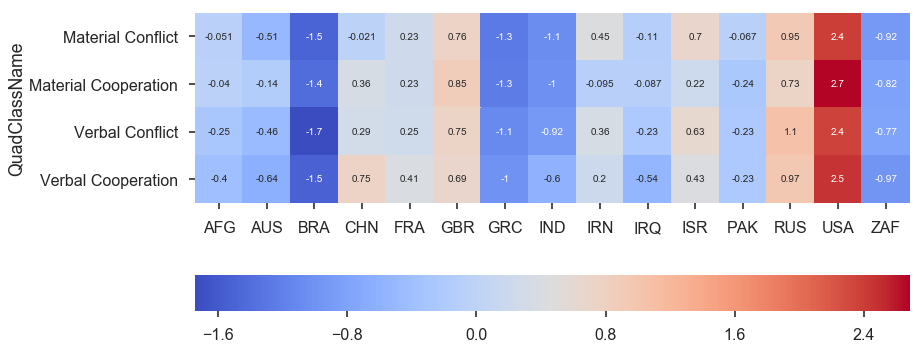

In [14]:
df_t = pd.concat(
    {
        k: df_t.groupby("QuadClassName")["NSources"].sum().apply(np.log10)
        for k, df_t in datasets.items()
    },
    axis=1
)


df_t = df_t.subtract(df_t.mean(axis=1), axis=0).divide(df_t.std(axis=1), axis=0)
sns.heatmap(
    df_t,
    square=True,
    cmap="coolwarm",
    annot=True,
    cbar_kws={"orientation": "horizontal"}
)



## Analyzing total events over time

In [15]:
df_all = pd.concat(
    [
        df_t.assign(data=k)
        for k, df_t in datasets.items()
    ],
    axis=0
)
df_all.head()

,Source,Target,Year,QuadClass,ECount,NSources,MaxSources,AvgSources,StdDevSources,QuadClassName,data
0,AFG,USA,2016,1,2337,6044,288,2.586222,11.648146,Verbal Cooperation,AFG
1,AFG,USA,2017,1,2653,8241,252,3.106295,11.890654,Verbal Cooperation,AFG
2,AFG,DEU,2015,1,219,2611,249,11.922374,38.436513,Verbal Cooperation,AFG
3,AFG,PAK,2016,2,398,1905,243,4.786432,22.123699,Material Cooperation,AFG
4,AFG,PAK,2016,3,1224,3041,191,2.484477,9.858347,Verbal Conflict,AFG


In [16]:
df_t_all = df_all[df_all["QuadClass"] == 1].groupby("Year")["ECount"].agg([np.mean, stats.sem])
df_t_all.head()

,mean,sem
Year,,
1979,14.064892,1.384888
1980,16.723529,1.702673
1981,19.963181,1.713061
1982,21.874459,2.403050
1983,21.394161,2.111386


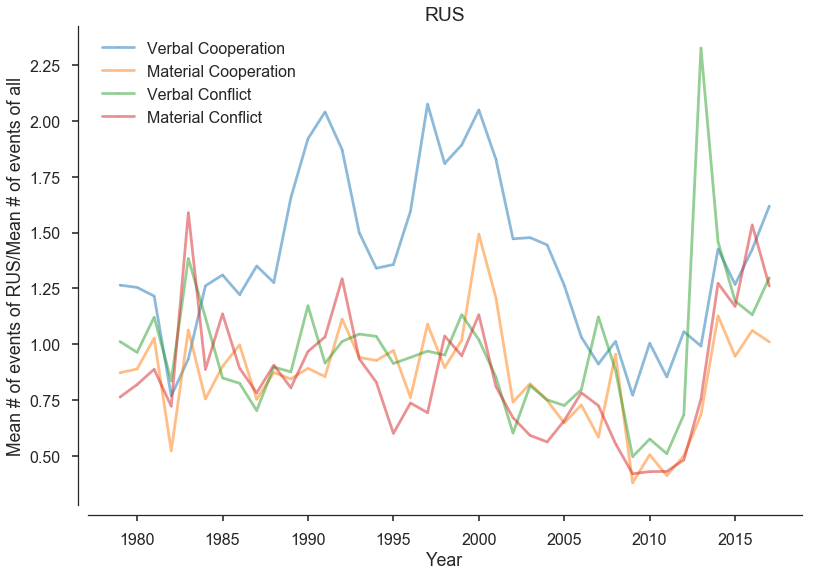

In [17]:
country = "RUS"
df = datasets[country]

for i in range(1,5):
    idx = df["QuadClass"] == i
    df_t = df[idx].groupby("Year")["ECount"].agg([np.mean, stats.sem])
    df_t_all = df_all[df_all["QuadClass"] == i].groupby("Year")["ECount"].agg([np.mean, stats.sem])

    #print(df_t.shape)
    #print(df_t.head())
    plt.plot(
        df_t.index,
        df_t["mean"]/df_t_all["mean"],
        #yerr=df_t["sem"],
        marker=".",
        linestyle="-",
        alpha=0.5,
        ms=2,
        label="{}".format(QUAD_CLASSES[i])
    )
plt.xlabel("Year")
plt.ylabel("Mean # of events of {}/Mean # of events of all".format(country))
plt.title(country)
#plt.yscale("symlog")
plt.legend()
sns.despine(offset=10)

In [18]:
df_t["mean"].head()

Year
1979     3.250000
1980     4.875000
1981     5.086957
1982     4.217391
1983    11.235294
Name: mean, dtype: float64

In [19]:
df_t_all["mean"].head()

Year
1979    4.260274
1980    5.953125
1981    5.732057
1982    5.843902
1983    7.069444
Name: mean, dtype: float64

In [20]:
def normed_target_value(target, column):
    def get_value(g):
        target_value = g[g["Target"] == target][column]
        mean_value = g[column].mean()
        if not target_value.values:
            return 0
        return (target_value/mean_value).values[0]
    return get_value

In [21]:
COLOR_PALLETE=["#7570b3", "#1b9e77", "#d95f02", "#e7298a",]
def plot_events(datasets, source, target, events, show_legend=False, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1,1)
    df = datasets[source]
    for i in [1,3,2,4]:
        idx = (df["QuadClass"] == i)
        df_t = df[idx].groupby("Year")
        df_t = df_t.apply(normed_target_value(target, "ECount"))
        ax.plot(
            df_t,
            #yerr=df_t["sem"],
            linestyle="-",
            alpha=0.8,
            lw=2,
            #color=COLOR_PALLETE[i-1],
            label="{}".format(QUAD_CLASSES[i])
        )
    ax.set_xlabel("Year")
    """ax.set_ylabel(
        "No. of events b/w {source}-{target} / \nMean no. of events of {source}".format(
            source=source,
            target=target
        )
    )"""
    ax.set_ylabel("Normalized Event Rate")

    for event in events:
        ax.axvspan(event["year"][0], event["year"][1], alpha=0.1, color='0.5')
        ax.annotate(event["title"], xy=(event["year"][0], event["value"]), fontsize=16)
    ax.set_title("{} - {}".format(source, target))
    if show_legend:
        ax.legend()
    sns.despine(offset=10)
    return ax

In [22]:
EVENTS = {
    "USA": {
        "IRQ": [
            {
                "title": "Gulf war",
                "year": [1991, 1993],
                "value": 20
            },
            {
                "title": "Iraq war",
                "year": [2003, 2007],
                "value": 40
            },
            {
                "title": "Rise of\nISIL",
                "year": [2012, 2014],
                "value": 25
            }
        ],
        "AFG": [
            {
                "title": "Afghanistan\nwar",
                "year": [2001, 2003],
                "value": 20
            },
            {
                # https://en.wikipedia.org/wiki/Iraq_War#2009:_Coalition_redeployment
                "title": "Coalition\nredeployment",
                "year": [2009, 2011],
                "value": 40
            }
        ],
        "PAK": [
            {
                "title": "Rift/\nEmbargo",
                "year": [1992, 1998],
                "value": 20
            },
            {
                "title": "911\nfollowup",
                "year": [2001, 2003],
                "value": 20
            },
            {
                "title": "Osama\nKilled\n(other\nskirmishes)",
                "year": [2008, 2012],
                "value": 20
            }
        ],
        "RUS": [
            {
                # https://en.wikipedia.org/wiki/Edward_Snowden
                "title": "Snowden\nmoves Russia,\nOther issues",
                "year": [2013, 2017],
                "value": 30
            }
        ]
    }
}

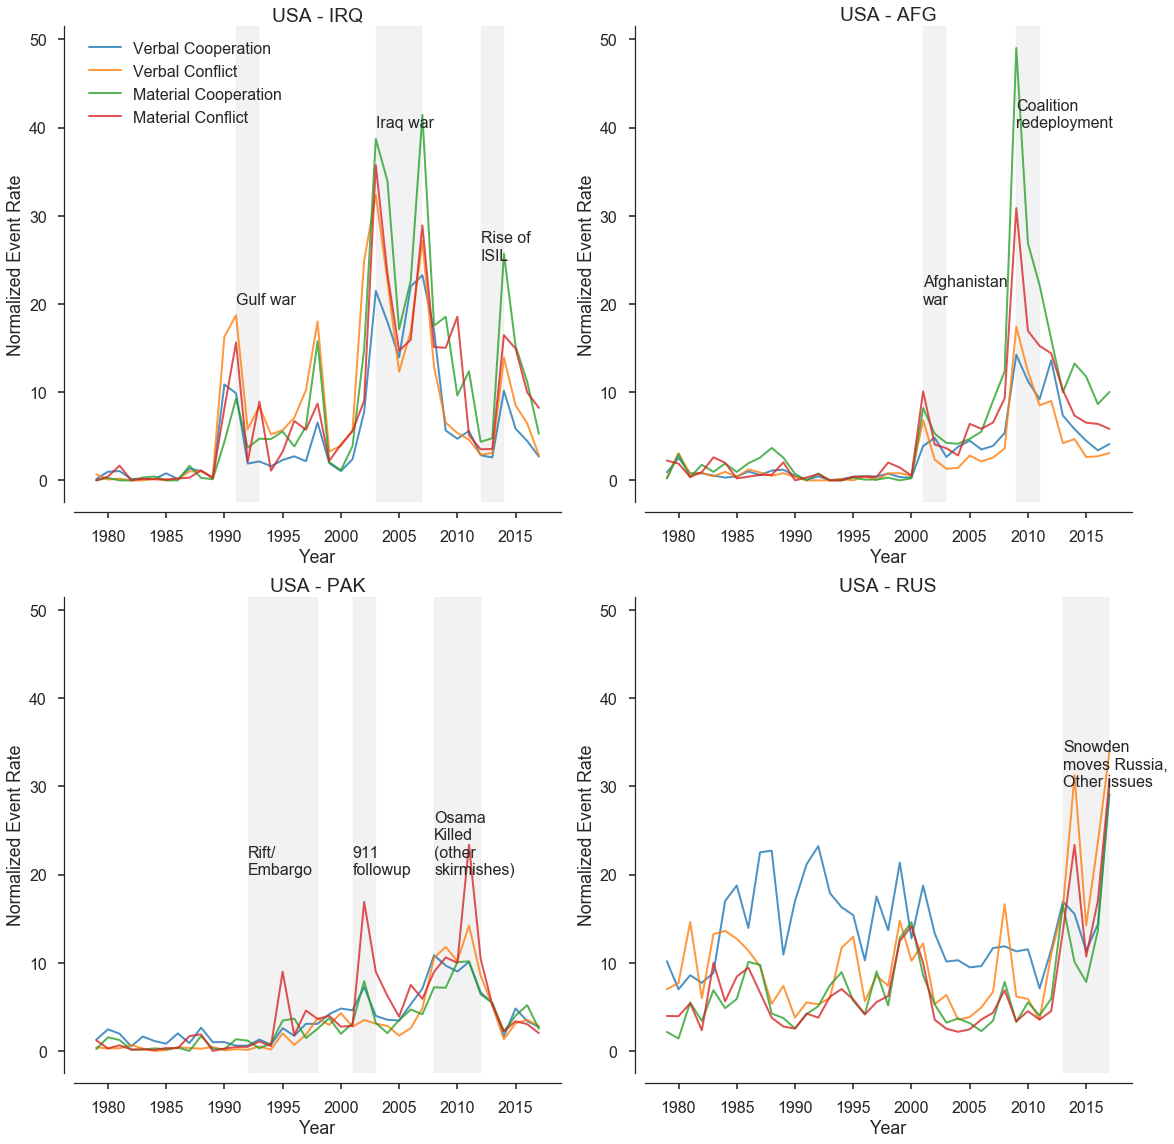

In [23]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(16, 16))

ax = ax.flatten()
source = "USA"
for i, target in enumerate(["IRQ", "AFG", "PAK", "RUS"]):
    events = EVENTS[source][target]
    plot_events(datasets, source, target, events, show_legend=False, ax=ax[i])
    
ax[0].legend()
fig.tight_layout()

plt.savefig("USA-Events.svg", bbox_inches="tight")

In [24]:
EVENTS = {
    "IND": {
        "PAK": [
            {
                "title": "Kargil\nWar",
                "year": [1998, 1999],
                "value": 25
            },
            {
                "title": "Parliament\nAttacks",
                "year": [2001, 2002],
                "value": 2
            },
            {
                "title": "Mumbai\nAttack",
                "year": [2008, 2009],
                "value": 5
            },
            {
                "title": "Gujrat\nearthquake\nsupport",
                "year": [2001, 2002],
                "value": 19
            },
            {
                "title": "Peace\nInitiatives",
                "year": [2004, 2006],
                "value": 25
            },
            {
                "title": "Peace\ntalks",
                "year": [2011, 2012],
                "value": 25
            }
        ],
        "USA": [
            {
                "title": "PM meets\nBush",
                "year": [2001, 2002],
                "value": 10
            },
            {
                # https://en.wikipedia.org/wiki/India%E2%80%93United_States_relations#NDA_government_.281998.E2.80.932004.29
                # Devyani Khorbode incident in 2013
                "title": "Spying\nAllegation,\nDiplomat\nIssue",
                "year": [2013, 2014],
                "value": 20
            },
            {
                "title": "Obama\nVisit",
                "year": [2009, 2010],
                "value": 30
            }

        ]
    },
    "CHN": {
        "PAK": [
            # China–Pakistan Economic Corridor
            {
                "title": "Economic\nCorridor",
                "year": [2014, 2017],
                "value": 9
            },
            {
                "title": "Joint\nmilitary\ndrill,\nFood supply,\nVisit",
                "year": [2010, 2011],
                "value": 20
            },
            {
                "title": "Tank project",
                "year": [2001, 2002],
                "value": 8
            }
            
        ],
        "USA": [
            {
                # https://en.wikipedia.org/wiki/United_States_bombing_of_the_Chinese_embassy_in_Belgrade
                "title": "US bombing\nof embassy",
                "year": [1999, 2000],
                "value": 25
            },
            {
                # https://en.wikipedia.org/wiki/United_States_bombing_of_the_Chinese_embassy_in_Belgrade
                "title": "Jiang Zemen\nUS visit",
                "year": [1997, 1998],
                "value": 40
            },
            {
                # https://en.wikipedia.org/wiki/United_States_bombing_of_the_Chinese_embassy_in_Belgrade
                "title": "Obama invite\nfor logistic\ncooperation",
                "year": [2012, 2013],
                "value": 40
            },
        ]
    }
}

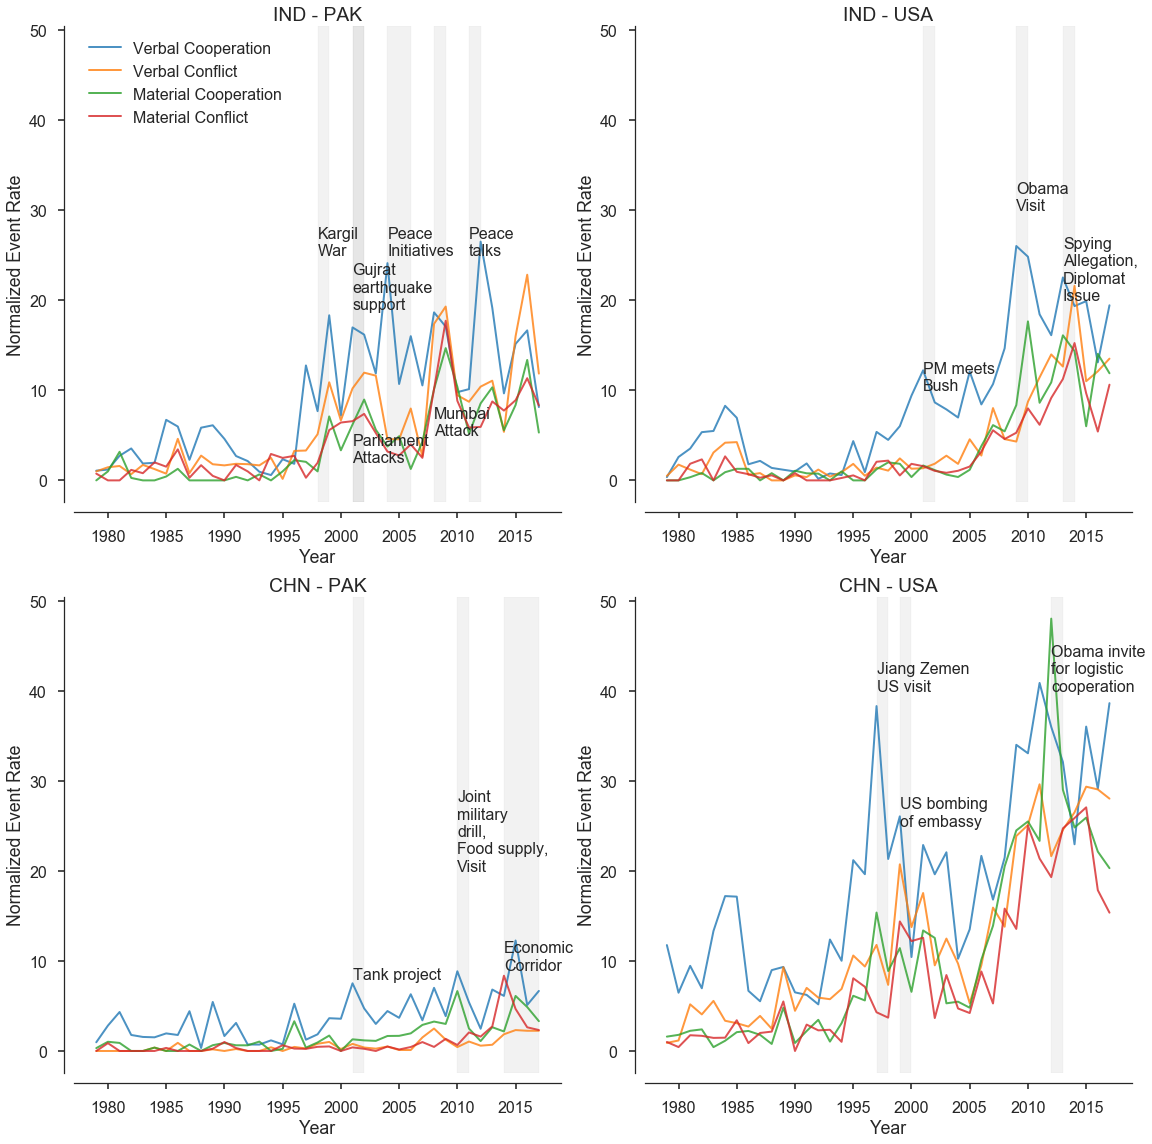

In [25]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(16, 16))

for i, source in enumerate(["IND", "CHN"]):
    for j, target in enumerate(["PAK", "USA"]):
        events = EVENTS[source][target]
        plot_events(datasets, source, target, events, show_legend=False, ax=ax[i][j])
ax[0][0].legend()
fig.tight_layout()

plt.savefig("IND-CHN-Events.svg", bbox_inches="tight")